<a href="https://colab.research.google.com/github/SoMuchSerenity/Deep-Learning/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np 
import tensorflow as tf
from tensorflow import keras

In [4]:
url = 'https://raw.githubusercontent.com/SoMuchSerenity/Deep-Learning/main/train.csv'
train = pd.read_csv(url)

In [5]:
train.head(10)

,id,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Grade
0,0,GP,F,16,U,GT3,A,0,3,teacher,...,5,4,2,1,0,4,2,8,13,7
1,1,MS,M,17,U,GT3,T,4,0,other,...,4,2,4,2,2,1,28,12,10,12
2,2,MS,F,17,U,LE3,T,1,0,services,...,4,4,2,1,2,2,3,11,9,8
3,3,GP,M,17,R,LE3,T,2,2,health,...,2,4,2,2,2,4,2,16,15,9
4,4,MS,F,14,R,LE3,T,0,1,health,...,3,3,2,2,1,4,0,9,14,8
5,5,GP,F,16,U,GT3,T,1,1,services,...,1,3,1,1,2,1,1,16,12,8
6,6,MS,M,16,U,GT3,T,4,1,at_home,...,2,4,1,1,1,2,15,11,11,9
7,7,GP,M,14,U,GT3,T,2,3,teacher,...,5,2,4,0,1,5,0,14,14,9
8,8,GP,F,14,R,LE3,A,3,1,services,...,4,2,2,2,1,2,4,16,17,9
9,9,GP,M,14,R,GT3,A,3,0,teacher,...,4,0,0,6,3,1,2,15,17,10


In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20064 entries, 0 to 20063
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          20064 non-null  int64 
 1   school      20064 non-null  object
 2   sex         20064 non-null  object
 3   age         20064 non-null  int64 
 4   address     20064 non-null  object
 5   famsize     20064 non-null  object
 6   Pstatus     20064 non-null  object
 7   Medu        20064 non-null  int64 
 8   Fedu        20064 non-null  int64 
 9   Mjob        20064 non-null  object
 10  Fjob        20064 non-null  object
 11  reason      20064 non-null  object
 12  guardian    20064 non-null  object
 13  traveltime  20064 non-null  int64 
 14  studytime   20064 non-null  int64 
 15  failures    20064 non-null  int64 
 16  schoolsup   20064 non-null  object
 17  famsup      20064 non-null  object
 18  paid        20064 non-null  object
 19  activities  20064 non-null  object
 20  nurser

In [27]:
x = train.select_dtypes(include=['object'])

In [28]:
x

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,teacher,services,home,mother,no,yes,no,yes,yes,no,yes,no
1,MS,M,U,GT3,T,other,services,home,other,no,yes,no,yes,yes,yes,yes,yes
2,MS,F,U,LE3,T,services,at_home,course,mother,yes,no,no,yes,no,no,yes,yes
3,GP,M,R,LE3,T,health,other,reputation,father,no,yes,no,no,yes,yes,yes,no
4,MS,F,R,LE3,T,health,teacher,reputation,mother,yes,yes,yes,yes,yes,yes,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20059,GP,F,U,GT3,T,services,teacher,reputation,mother,no,yes,no,no,yes,yes,yes,no
20060,GP,M,U,LE3,T,teacher,teacher,other,mother,yes,yes,no,yes,yes,no,yes,yes
20061,GP,F,U,GT3,T,other,other,other,father,no,yes,no,no,yes,yes,no,no
20062,MS,M,U,GT3,T,services,other,reputation,other,no,no,no,no,yes,no,yes,no


In [41]:
y = train.select_dtypes(include=['int64'])
y

,id,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Grade
0,0,16,0,3,2,2,1,5,4,2,1,0,4,2,8,13,7
1,1,17,4,0,1,4,0,4,2,4,2,2,1,28,12,10,12
2,2,17,1,0,1,2,0,4,4,2,1,2,2,3,11,9,8
3,3,17,2,2,3,1,0,2,4,2,2,2,4,2,16,15,9
4,4,14,0,1,1,0,0,3,3,2,2,1,4,0,9,14,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20059,20059,15,3,1,1,1,0,4,3,4,6,2,4,3,20,18,9
20060,20060,17,2,1,1,1,0,4,3,1,1,2,4,2,17,16,8
20061,20061,17,0,1,4,1,0,3,1,1,0,1,4,1,11,14,8
20062,20062,17,3,1,1,2,0,2,2,2,0,1,2,5,11,15,8


In [46]:
y = y.drop(['id'],1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [47]:
y

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Grade
0,16,0,3,2,2,1,5,4,2,1,0,4,2,8,13,7
1,17,4,0,1,4,0,4,2,4,2,2,1,28,12,10,12
2,17,1,0,1,2,0,4,4,2,1,2,2,3,11,9,8
3,17,2,2,3,1,0,2,4,2,2,2,4,2,16,15,9
4,14,0,1,1,0,0,3,3,2,2,1,4,0,9,14,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20059,15,3,1,1,1,0,4,3,4,6,2,4,3,20,18,9
20060,17,2,1,1,1,0,4,3,1,1,2,4,2,17,16,8
20061,17,0,1,4,1,0,3,1,1,0,1,4,1,11,14,8
20062,17,3,1,1,2,0,2,2,2,0,1,2,5,11,15,8


In [30]:
y.describe()

,id,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Grade
count,20064.000000,20064.000000,20064.000000,20064.000000,20064.000000,20064.000000,20064.000000,20064.000000,20064.000000,20064.000000,20064.000000,20064.000000,20064.000000,20064.000000,20064.000000,20064.000000,20064.000000
mean,10031.500000,15.649970,2.532197,1.551585,1.705891,1.541368,0.134619,3.939593,2.850778,2.174043,1.812450,1.956788,2.832137,2.009270,13.905702,12.252043,9.024771
std,5792.122236,1.204188,1.128737,1.036555,1.117113,0.993014,0.460545,0.871920,1.143260,1.256756,1.483721,1.392719,1.437471,3.505567,3.265775,3.474807,1.311570
min,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,5015.750000,15.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,2.000000,1.000000,1.000000,1.000000,2.000000,0.000000,12.000000,10.000000,8.000000
50%,10031.500000,16.000000,3.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,2.000000,3.000000,1.000000,14.000000,12.000000,9.000000
75%,15047.250000,16.000000,3.000000,2.000000,2.000000,2.000000,0.000000,5.000000,4.000000,3.000000,2.000000,3.000000,4.000000,3.000000,16.000000,15.000000,9.000000
max,20063.000000,21.000000,4.000000,4.000000,6.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,6.000000,5.000000,39.000000,22.000000,22.000000,18.000000


In [32]:
import seaborn as sns
import matplotlib.pyplot as plt


Text(0.5, 1.0, 'Correlation Analysis')

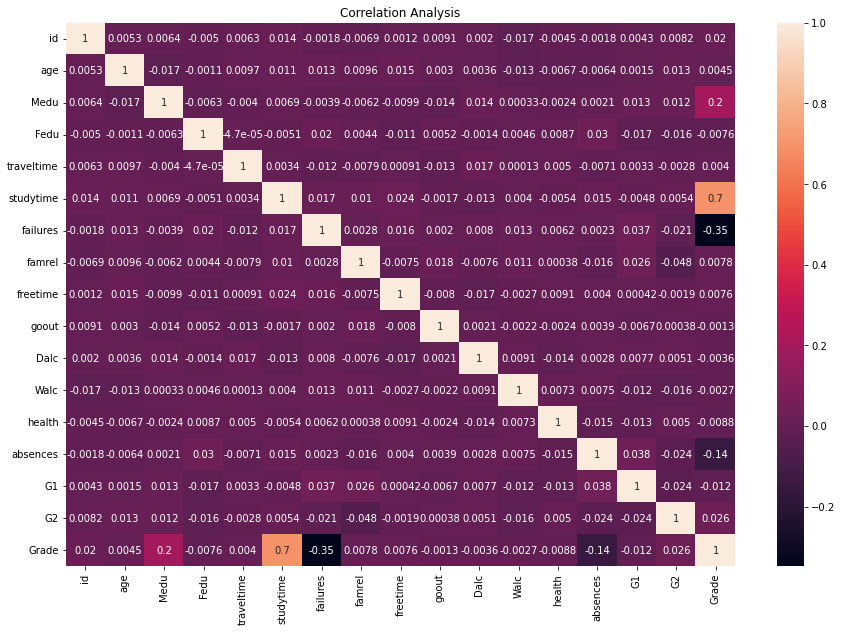

In [44]:
plt.figure(figsize=(15,10))
sns.heatmap(y.corr(), annot=True)
plt.title('Correlation Analysis')


In [40]:
correlation_matrix = y.corr()
correlation_matrix["Grade"].sort_values(ascending=False)


Grade         1.000000
studytime     0.699380
Medu          0.196841
G2            0.026015
id            0.020320
famrel        0.007759
freetime      0.007551
age           0.004543
traveltime    0.003952
goout        -0.001315
Walc         -0.002661
Dalc         -0.003632
Fedu         -0.007594
health       -0.008792
G1           -0.011661
absences     -0.143699
failures     -0.348047
constant           NaN
Name: Grade, dtype: float64

In [48]:
correlation_matrix = y.corr()
correlation_matrix["Grade"].sort_values(ascending=False)


Grade         1.000000
studytime     0.699380
Medu          0.196841
G2            0.026015
famrel        0.007759
freetime      0.007551
age           0.004543
traveltime    0.003952
goout        -0.001315
Walc         -0.002661
Dalc         -0.003632
Fedu         -0.007594
health       -0.008792
G1           -0.011661
absences     -0.143699
failures     -0.348047
Name: Grade, dtype: float64

In [7]:
train['Mjob'].value_counts()

other       7007
at_home     4441
services    4032
teacher     2309
health      2275
Name: Mjob, dtype: int64

In [8]:
train['famsize'].value_counts()

GT3    13642
LE3     6422
Name: famsize, dtype: int64

In [9]:
train['address'].value_counts()

U    14907
R     5157
Name: address, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
